In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

MAX = 256

class CvImage:
    def __init__(self, name = None, image = None):
        self.image = cv2.imread(name, cv2.IMREAD_COLOR) if image is None else image
        self.__name = name

    def __str__(self):
        return self.__name
    
    def cvtColor(self, color):
        return CvImage(name = self.__name, image = cv2.cvtColor(self.image, color))

def readImage(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray', title = '') -> None:
    ax = plt.subplots()[1]
    # print(title)
    ax.title.set_text(title)
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)

def plothist(hist, color, title = '') -> None:
    ax = plt.subplots()[1]
    ax.title.set_text(title)
    ax.plot(hist, color)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)
    
    plt.tight_layout()

def showImageList(lista, cmap = 'viridis'):
    for item in lista:
        showImage(item, cmap)

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()

def plotHistograma(image, max = 256):        
    plt.xlabel('Tom de cinza')
    plt.ylabel('Probabilidade')

    plt.bar(range(max), image)
    plt.show()

In [3]:
def getLABChannels(image):
    (L, A, B) = cv2.split(image)
    zeros = np.zeros(image.shape[:2], dtype="uint8")

    ch1 = cv2.merge([L, zeros, zeros])
    ch2 = cv2.merge([zeros, A, zeros])
    ch3 = cv2.merge([zeros, zeros, B])
    
    return (ch1, ch2, ch3)

def plotLABChannelsHist(image):
    channels = cv2.split(image.image)
    channelNames = ['Luminosity', 'Green-Red', 'Blue-Yellow']
    lineColors = ['c', 'm', 'p']
    
    hists = [ cv2.calcHist([channel], [0], None, [256], [0,256]) for channel in channels ]
        
    for i in range(len(channels)):
        plothist(hists[i], color = lineColors[i], title=str(image) + ' channel ' + channelNames[i])

def getHSVChannels(image):
    (H, S, V) = cv2.split(image)
    zeros = np.zeros(image.shape[:2], dtype="uint8")

    ch1 = cv2.merge([H, zeros, zeros])
    ch2 = cv2.merge([zeros, S, zeros])
    ch3 = cv2.merge([zeros, zeros, V])
    
    return (ch1, ch2, ch3)

def plotHSVChannelsHist(image):
    channels = cv2.split(image.image)
    channelNames = ['Hue', 'Saturation', 'Intensity']
    lineColors = ['k', 'y', 'r']
    
    hists = [ cv2.calcHist([channel], [0], None, [256], [0,256]) for channel in channels ]
        
    for i in range(len(channels)):
        plothist(hists[i], color = lineColors[i], title=str(image) + ' channel ' + channelNames[i])

def getRGBChannels(image):
    (R, G, B) = cv2.split(image)
    zeros = np.zeros(image.shape[:2], dtype="uint8")

    ch1 = cv2.merge([R, zeros, zeros])
    ch2 = cv2.merge([zeros, G, zeros])
    ch3 = cv2.merge([zeros, zeros, B])
    
    return (ch1, ch2, ch3)

# def getRGBChannels(image):
#     (B, G, R) = cv2.split(image)
#     zeros = np.zeros(image.shape[:2], dtype="uint8")

#     ch1 = cv2.merge([zeros, zeros, R])
#     ch2 = cv2.merge([zeros, G, zeros])
#     ch3 = cv2.merge([B, zeros, zeros])
    
#     return (ch1, ch2, ch3)

def plotRGBChannelsHist(image):
    channels = cv2.split(image.image)
    channelNames = ['Red', 'Green', 'Blue']
    lineColors = ['r', 'g', 'b']
    
    hists = [ cv2.calcHist([channel], [0], None, [256], [0,256]) for channel in channels ]
        
    for i in range(len(channels)):
        plothist(hists[i], color=lineColors[i], title=str(image) + ' channel ' + channelNames[i])
    

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


/tmp/ipykernel_8488/3313447133.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axs = plt.subplots(nrows=1, ncols=len(images))


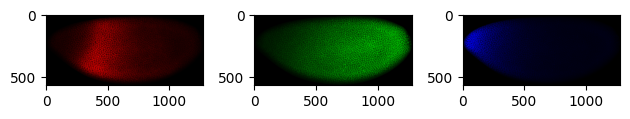

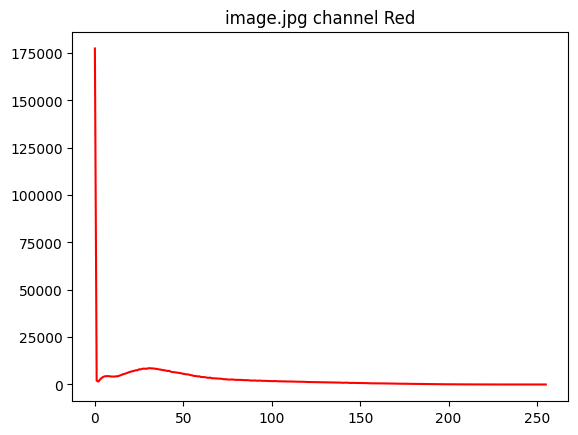

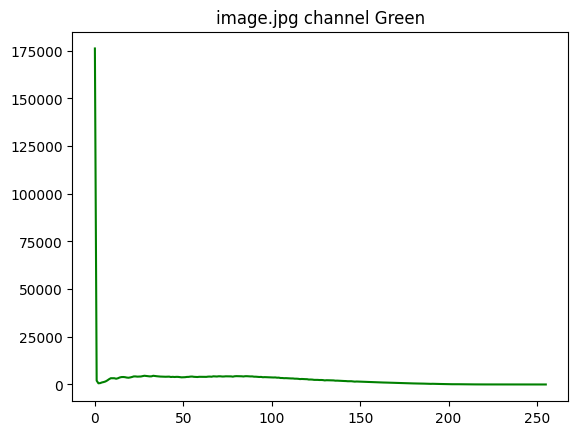

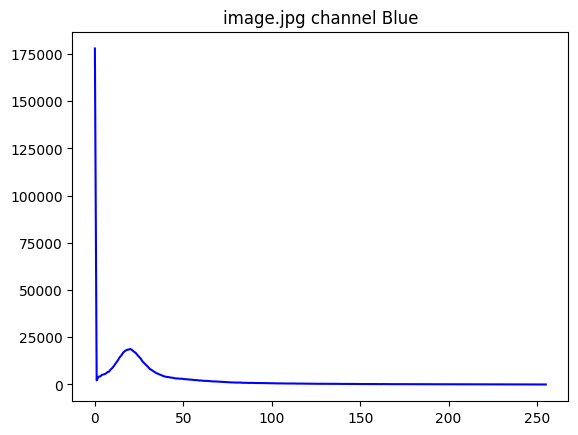

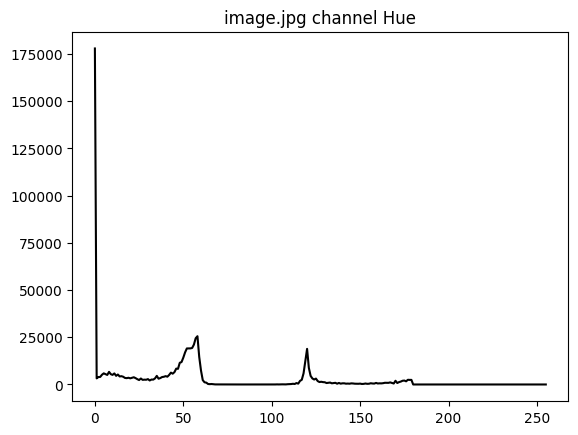

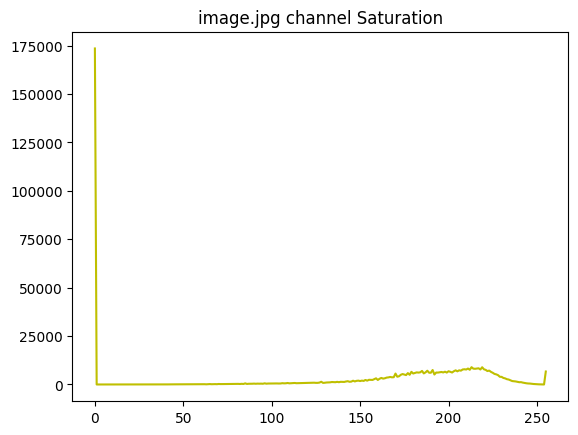

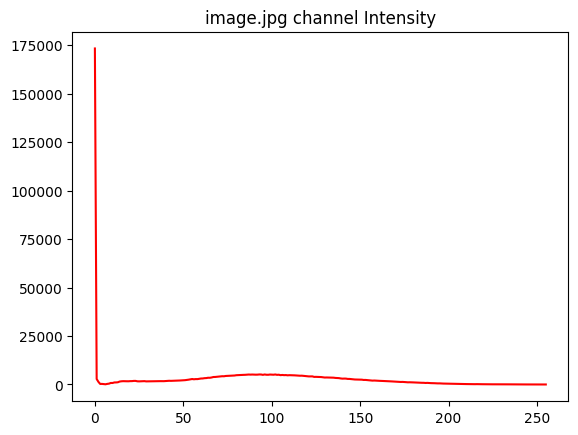

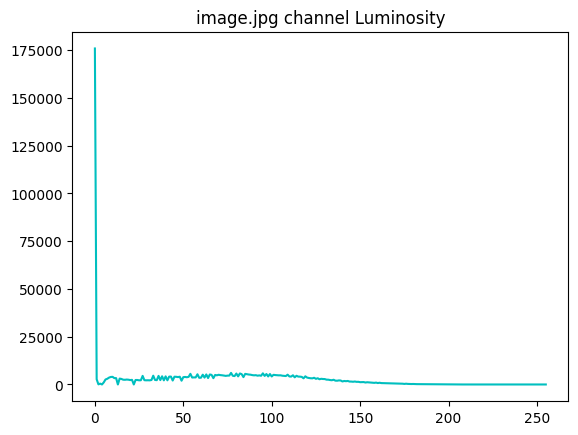

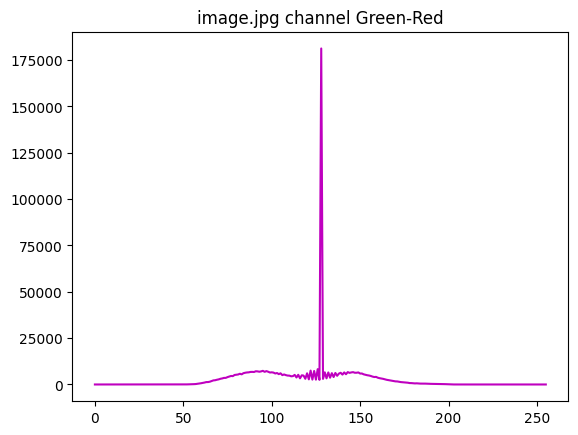

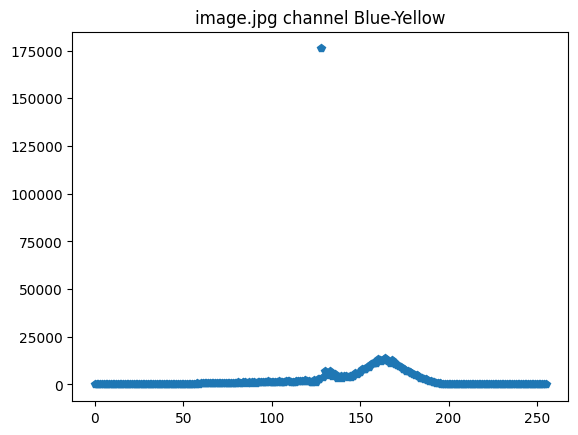

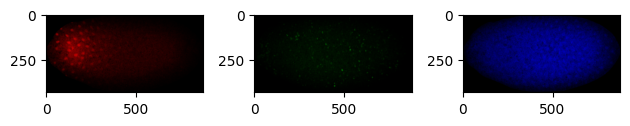

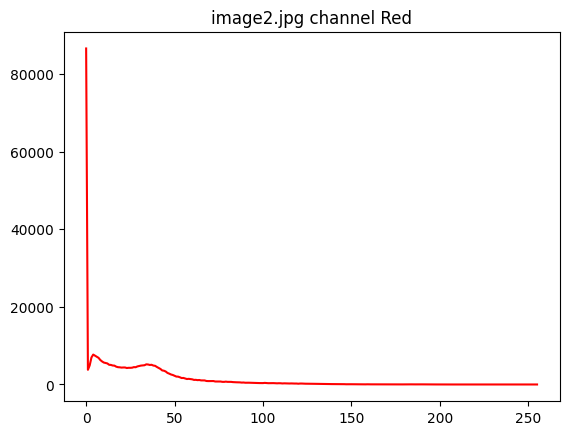

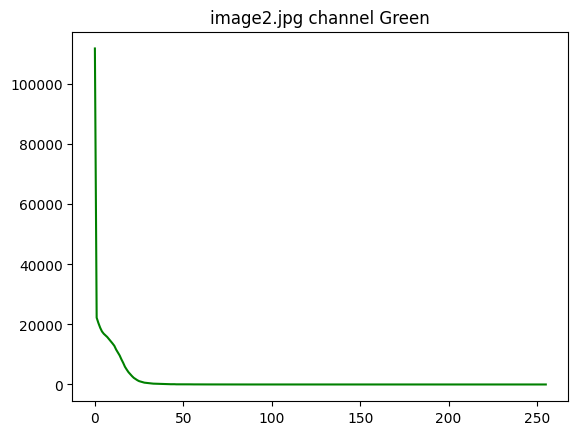

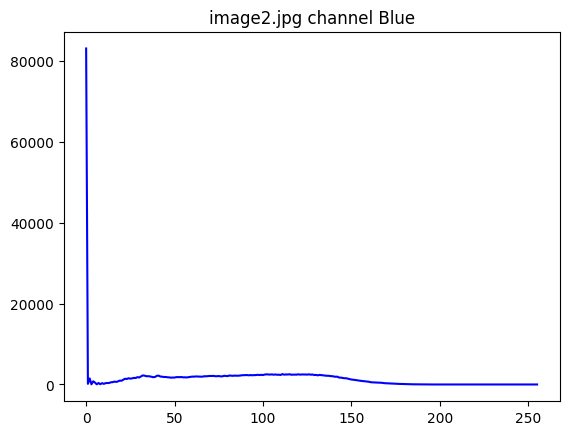

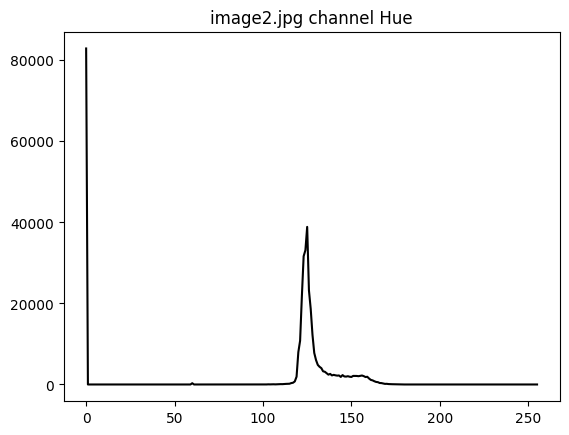

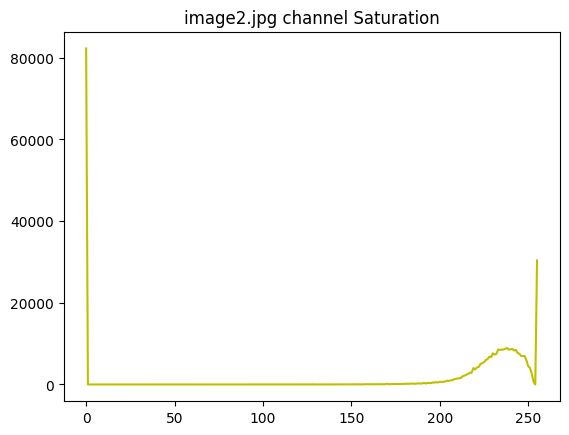

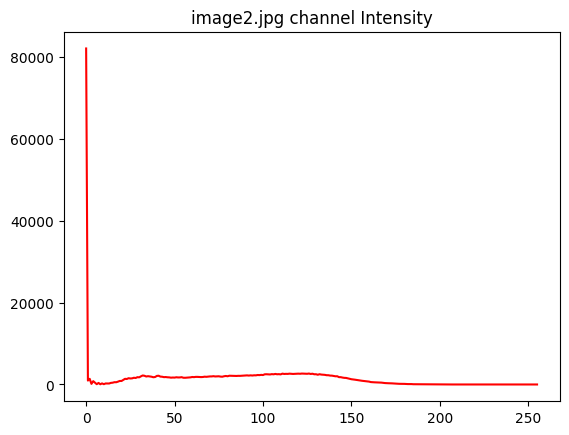

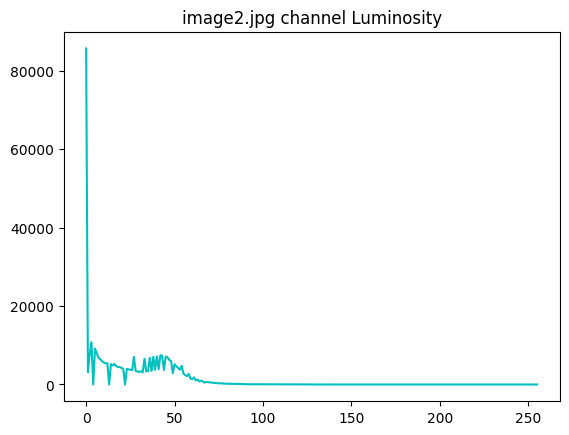

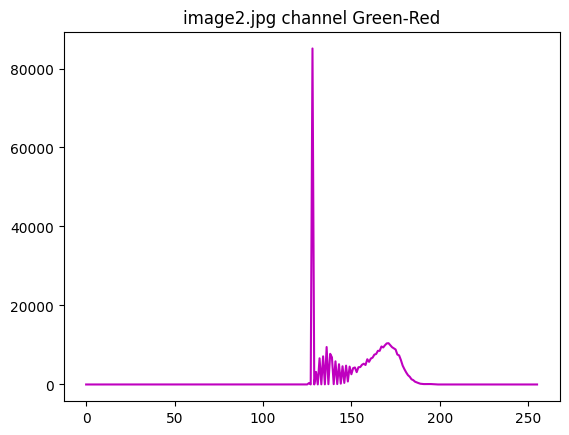

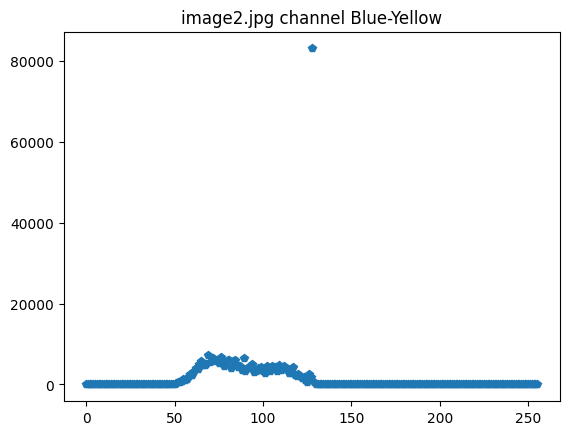

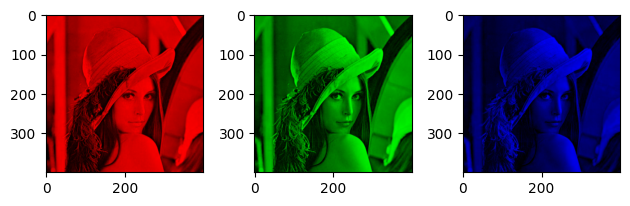

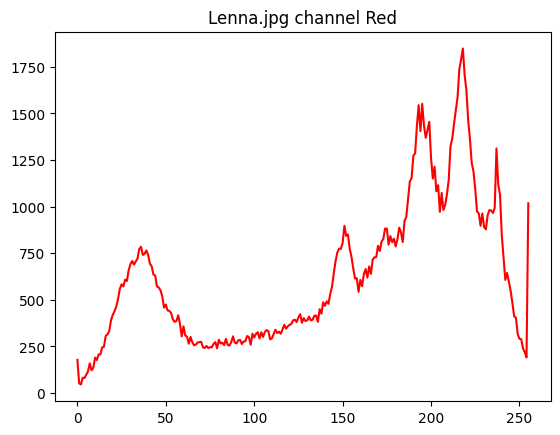

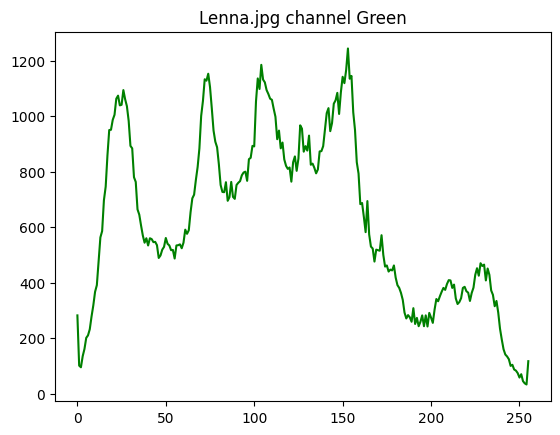

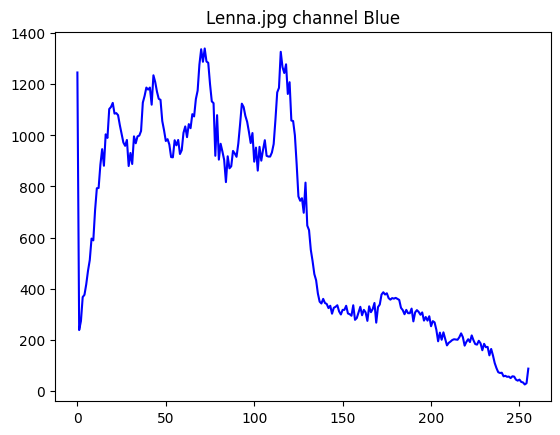

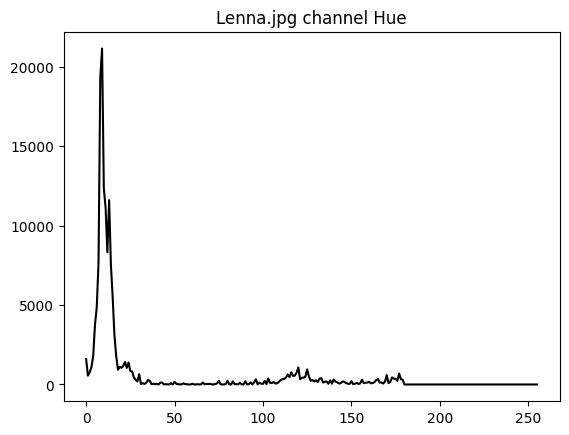

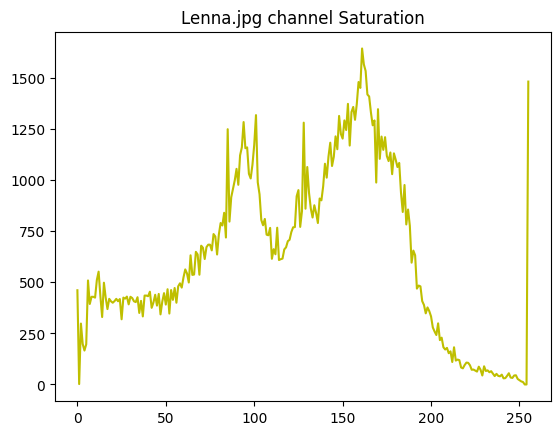

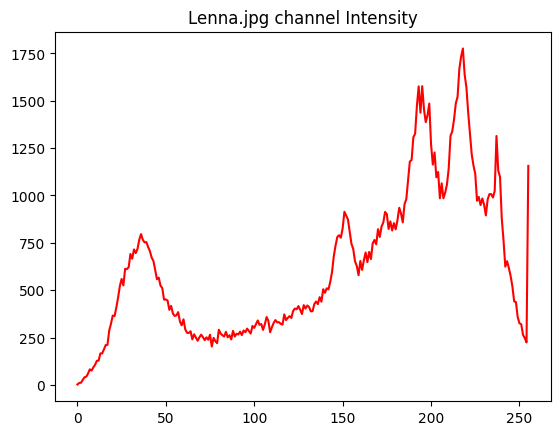

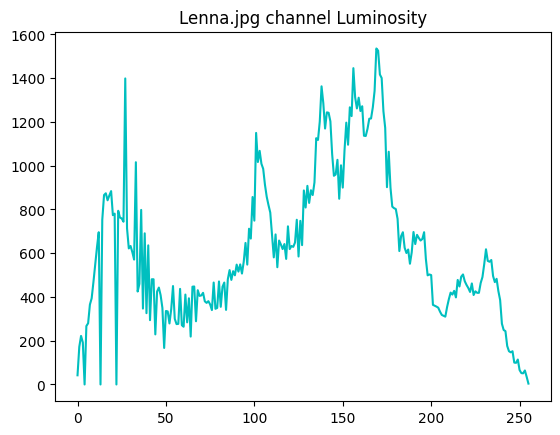

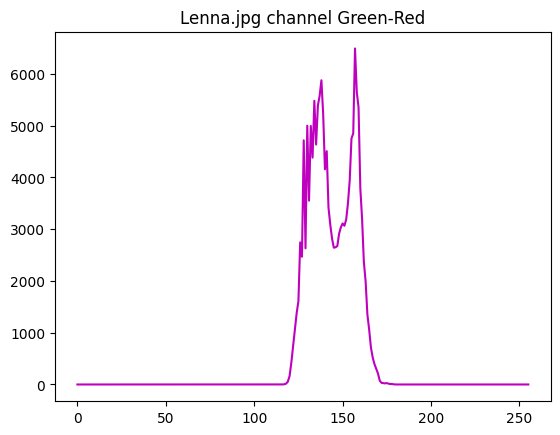

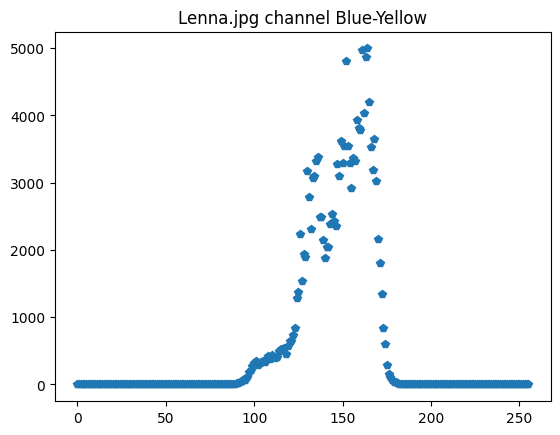

In [109]:
img1 = CvImage(name = "image.jpg")
img1RGB = img1.cvtColor(cv2.COLOR_BGR2RGB)
img1HSV = img1.cvtColor(cv2.COLOR_BGR2HSV)
img1LAB = img1.cvtColor(cv2.COLOR_BGR2LAB)

img2 = CvImage(name = "image2.jpg")
img2RGB = img2.cvtColor(cv2.COLOR_BGR2RGB)
img2HSV = img2.cvtColor(cv2.COLOR_BGR2HSV)
img2LAB = img2.cvtColor(cv2.COLOR_BGR2LAB)

img3 = CvImage(name = "Lenna.jpg")
img3RGB = img3.cvtColor(cv2.COLOR_BGR2RGB)
img3HSV = img3.cvtColor(cv2.COLOR_BGR2HSV)
img3LAB = img3.cvtColor(cv2.COLOR_BGR2LAB)

    
# showImageList(getRGBChannels(img1RGB))
# showImageList(getRGBChannels(img2RGB))
# showImageList(getRGBChannels(img3RGB))

showImages(getRGBChannels(img1RGB.image), 'viridis')
plotRGBChannelsHist(img1RGB)
plotHSVChannelsHist(img1HSV)
plotLABChannelsHist(img1LAB)

showImages(getRGBChannels(img2RGB.image), 'viridis')
plotRGBChannelsHist(img2RGB)
plotHSVChannelsHist(img2HSV)
plotLABChannelsHist(img2LAB)

showImages(getRGBChannels(img3RGB.image), 'viridis')
plotRGBChannelsHist(img3RGB)
plotHSVChannelsHist(img3HSV)
plotLABChannelsHist(img3LAB)




2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

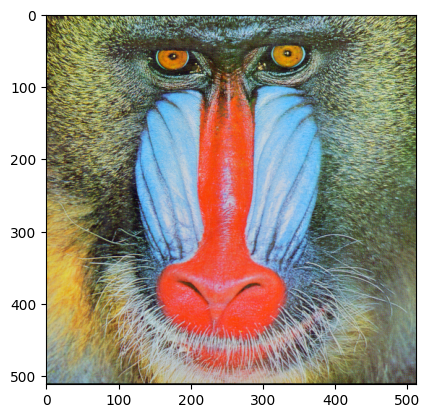

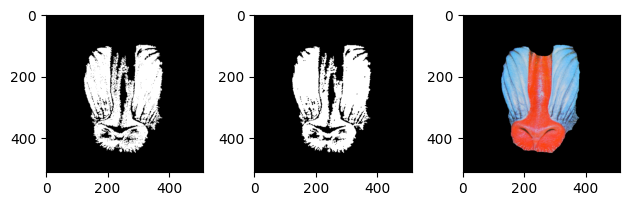

In [76]:
imgMand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
imgMandRGB = cv2.cvtColor(imgMand, cv2.COLOR_BGR2RGB)
imgMandHSV = cv2.cvtColor(imgMand, cv2.COLOR_BGR2HSV)

height, width, channels = imgMand.shape

(Hue, Saturation, Intensity) = cv2.split(imgMandHSV)

Hue *= 2

newImage = np.zeros((height, width))
newImage = newImage.astype('uint8')

newImage[Hue <= 15] = WHITE
newImage[Hue >= 200] = WHITE
newImage[Hue > 220] = BLACK

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
newImage = cv2.morphologyEx(newImage, cv2.MORPH_OPEN, kernel)

numComponents, rotulos, coords, _ = cv2.connectedComponentsWithStats(newImage, 8)
componentsSize = coords[1:,4]
biggestComponentSize = componentsSize.max()
thrs = componentsSize.tolist().index(biggestComponentSize) + 1

rotulos[rotulos != thrs] = BLACK
rotulos[rotulos == thrs] = WHITE

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
rotuloClosed2 = cv2.morphologyEx(rotulos.astype('uint8'), cv2.MORPH_CLOSE, kernel2)

kernel50 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
rotuloClosed50 = cv2.morphologyEx(rotulos.astype('uint8'), cv2.MORPH_CLOSE, kernel50)

coloredNose = np.array(imgMandRGB)
coloredNose[rotuloClosed50 == BLACK] = np.zeros(channels)

showImage(imgMandRGB)
showImages((rotulos, rotuloClosed2, coloredNose))


3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

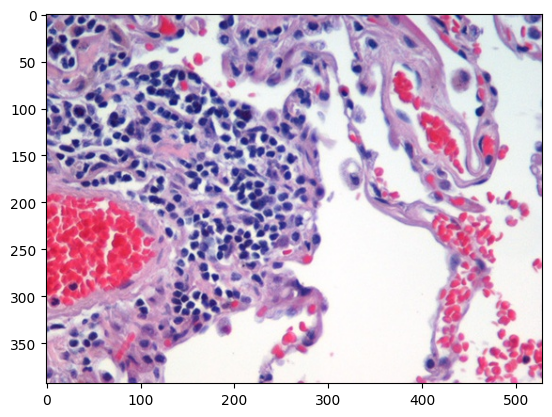

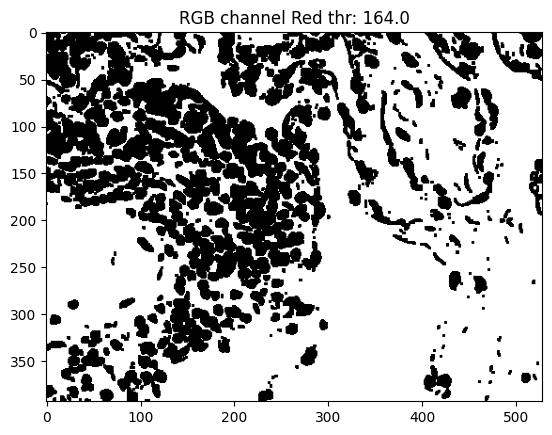

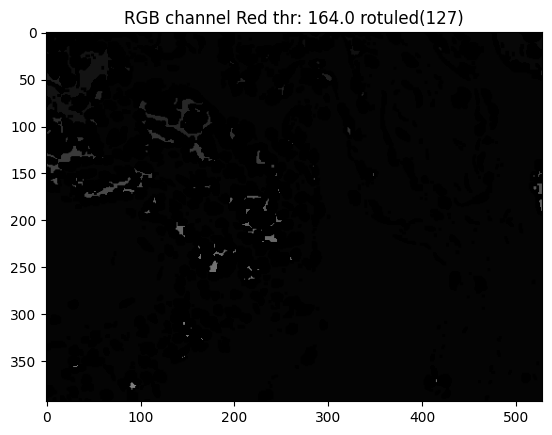

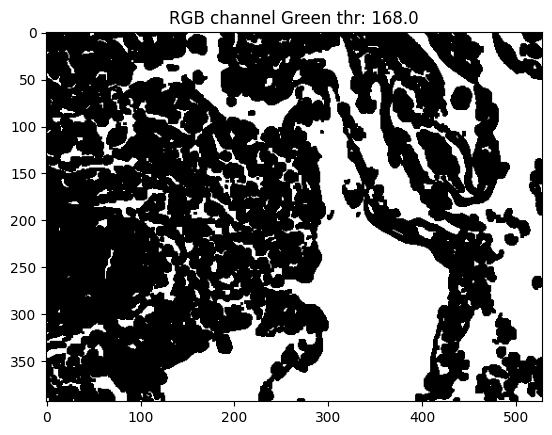

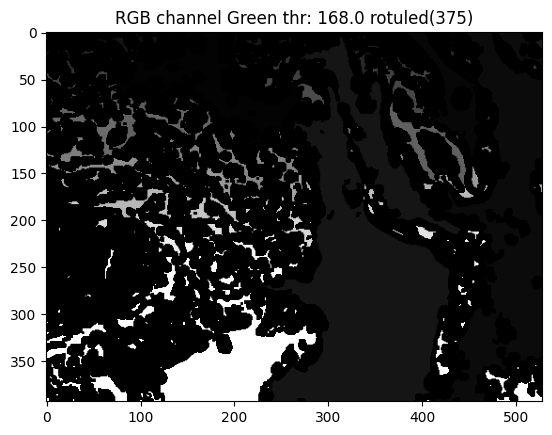

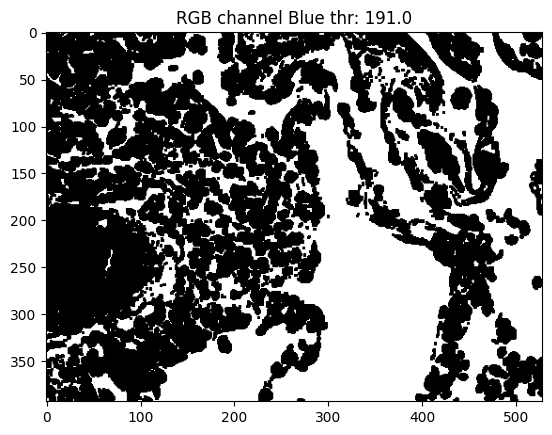

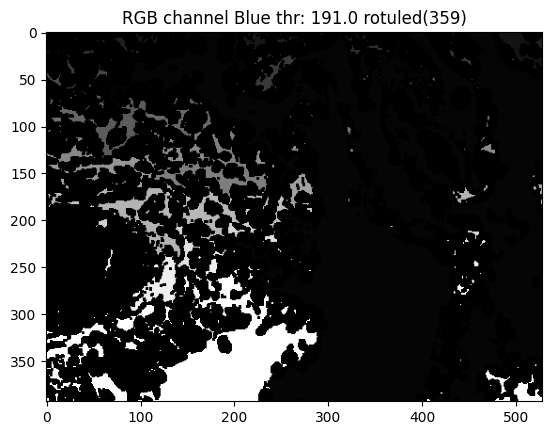

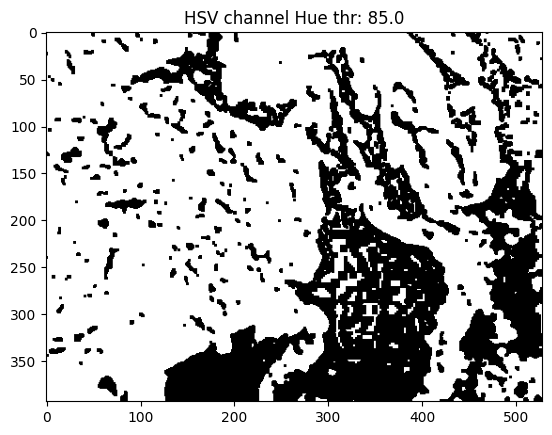

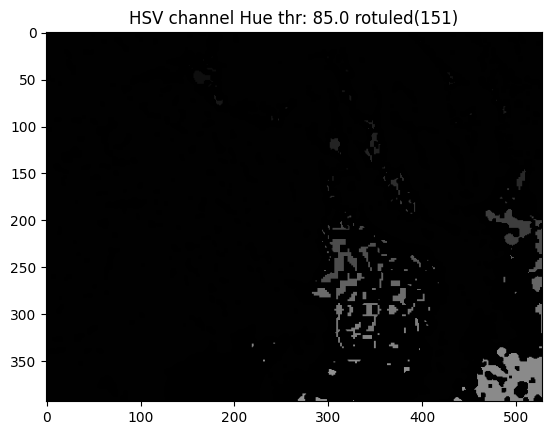

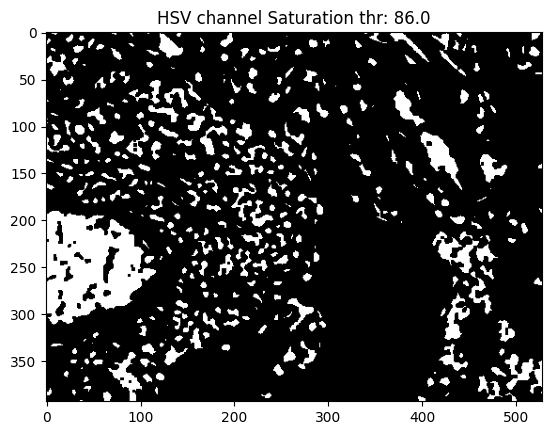

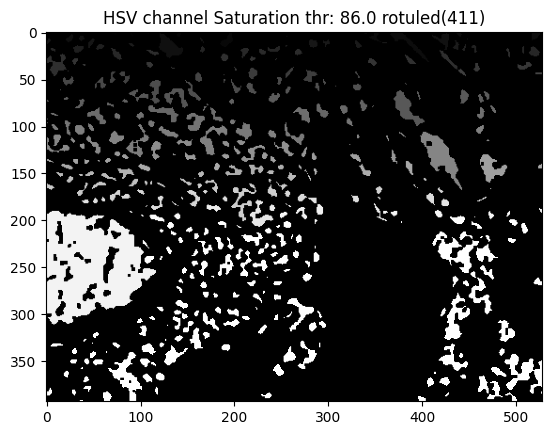

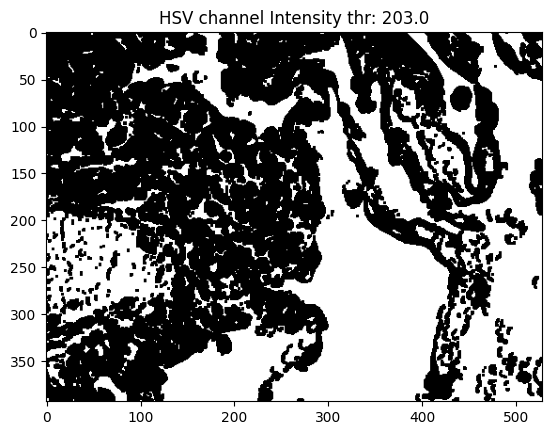

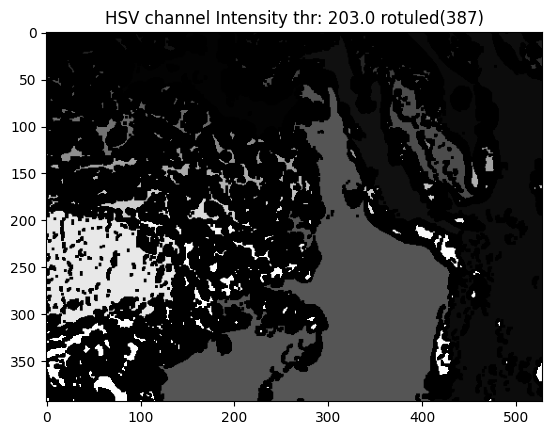

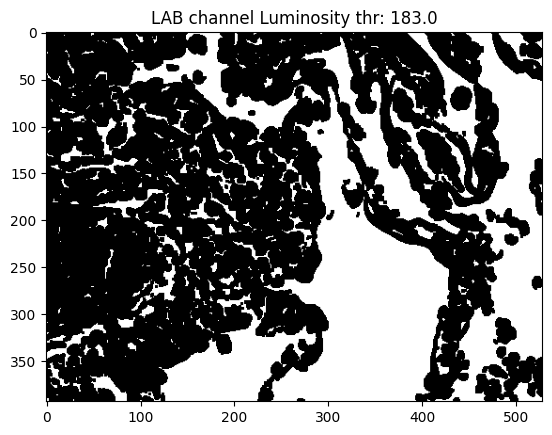

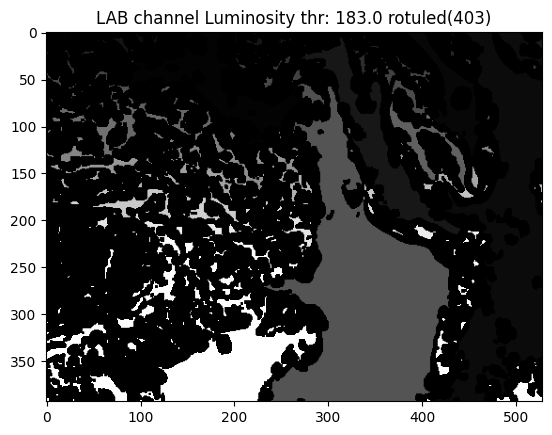

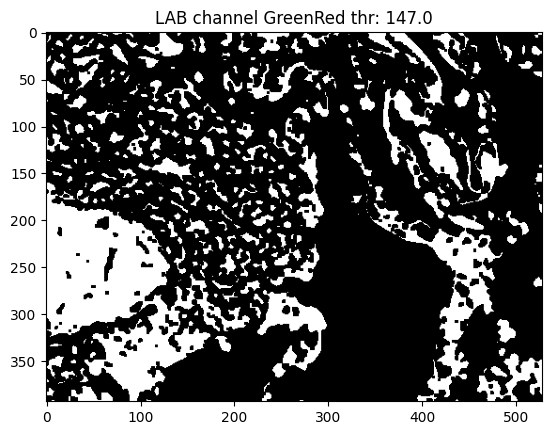

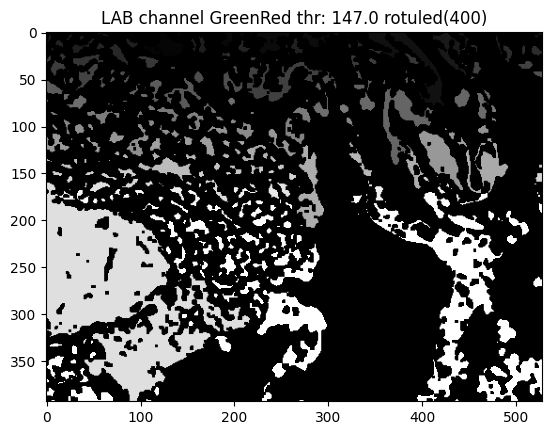

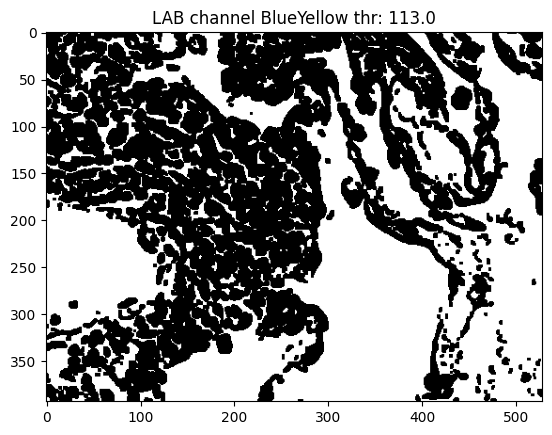

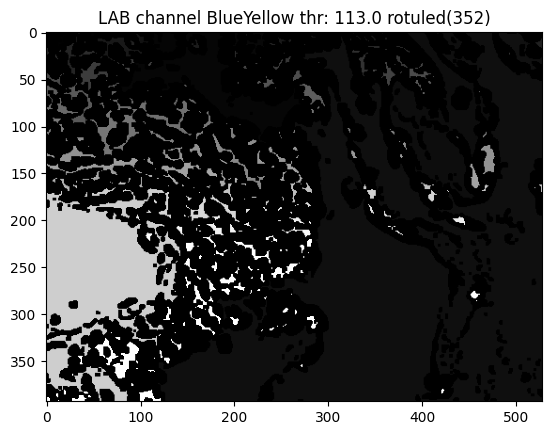

In [8]:
imgHe = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
imgHeRGB = cv2.cvtColor(imgHe, cv2.COLOR_BGR2RGB)
imgHeHSV = cv2.cvtColor(imgHe, cv2.COLOR_BGR2HSV)
imgHeLAB = cv2.cvtColor(imgHe, cv2.COLOR_BGR2LAB)

height, width, channels = imgHe.shape

showImage(imgHeRGB)

channelRGB = cv2.split(imgHeRGB)
channelHSV = cv2.split(imgHeHSV)
channelLAB = cv2.split(imgHeLAB)

thrsList = [ [] for _ in range(9) ]
titles = [
    'RGB channel Red',
    'RGB channel Green',
    'RGB channel Blue',
    'HSV channel Hue',
    'HSV channel Saturation',
    'HSV channel Intensity',
    'LAB channel Luminosity',
    'LAB channel GreenRed',
    'LAB channel BlueYellow',
]
for i in range(channels):
    thrsList[i].append(cv2.threshold(channelRGB[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU))
for i in range(channels):
    thrsList[i+3].append(cv2.threshold(channelHSV[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU))
for i in range(channels):
    thrsList[i+6].append(cv2.threshold(channelLAB[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU))

kernel = np.ones((3, 3), np.uint8)
for i in range(9):
    image = cv2.erode(thrsList[i][0][1], kernel, iterations=1)
    showImage(image, title = titles[i] + " thr: " + str(thrsList[i][0][0]))
    numComponents, rotulos = cv2.connectedComponents(image)
    showImage(rotulos, title = titles[i] + " thr: " + str(thrsList[i][0][0]) + " rotuled(" + str(numComponents) + ")")
    
# showImage(newImage)
# showImage(thB, 'viridis')